# Classification 5

We will discuss ensemble methods, particularly for decision trees.

## Example: Spam classification

We will try out these three ensemble methods for spam classification (data [here](https://archive.ics.uci.edu/ml/datasets/Spambase)).

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [3]:
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
         'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
         'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
         'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
         'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
         'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
         'capital_run_length_total', 'is_spam']
df = pd.read_csv('Classification_5_data/spambase.csv', header=None, names=names)

In [4]:
df.iloc[0]

word_freq_make                  0.000
word_freq_address               0.640
word_freq_all                   0.640
word_freq_3d                    0.000
word_freq_our                   0.320
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.000
word_freq_receive               0.000
word_freq_will                  0.640
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.320
word_freq_business              0.000
word_freq_email                 1.290
word_freq_you                   1.930
word_freq_credit                0.000
word_freq_your                  0.960
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

### Create formula for design matrices

In [5]:
formula = 'is_spam ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in df.columns.values\
                                    if x != 'is_spam'])
print(formula)

is_spam ~ Q("word_freq_make") + Q("word_freq_address") + Q("word_freq_all") + Q("word_freq_3d") + Q("word_freq_our") + Q("word_freq_over") + Q("word_freq_remove") + Q("word_freq_internet") + Q("word_freq_order") + Q("word_freq_mail") + Q("word_freq_receive") + Q("word_freq_will") + Q("word_freq_people") + Q("word_freq_report") + Q("word_freq_addresses") + Q("word_freq_free") + Q("word_freq_business") + Q("word_freq_email") + Q("word_freq_you") + Q("word_freq_credit") + Q("word_freq_your") + Q("word_freq_font") + Q("word_freq_000") + Q("word_freq_money") + Q("word_freq_hp") + Q("word_freq_hpl") + Q("word_freq_george") + Q("word_freq_650") + Q("word_freq_lab") + Q("word_freq_labs") + Q("word_freq_telnet") + Q("word_freq_857") + Q("word_freq_data") + Q("word_freq_415") + Q("word_freq_85") + Q("word_freq_technology") + Q("word_freq_1999") + Q("word_freq_parts") + Q("word_freq_pm") + Q("word_freq_direct") + Q("word_freq_cs") + Q("word_freq_meeting") + Q("word_freq_original") + Q("word_freq_

The **Q()** function stands for _quoting_, and is necessary when you have features like **char\_freq\_(**, in which the parenthesis throws off the _dmatrices()_ function. **Q("char\_freq\_(")** tells Python to consider the entire thing as a string.

## Create design matrices

In [6]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['is_spam'].values

## Create training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

## Set up all the classifiers

In [8]:
# All the models we want to test out
models = {}
models['Decision Tree'] = \
    tree.DecisionTreeClassifier(criterion='entropy')

models['Bagging'] = \
    BaggingClassifier(
        tree.DecisionTreeClassifier(criterion='entropy'),
        random_state=1)

models['Random Forest'] = \
    RandomForestClassifier(n_estimators=10,
                           random_state=1)

models['Gradient Boosting'] = \
    GradientBoostingClassifier(n_estimators=200,
                               max_depth=4,
                               random_state=1)

## Fit the models

In [9]:
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


## Accuracy scores

In [10]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    
df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Training Accuracy,Test Accuracy
Decision Tree,0.999689,0.927589
Bagging,0.995963,0.947864
Random Forest,0.995963,0.946416
Gradient Boosting,0.987888,0.957277


All the classifiers (except perhaps Gradient Boosted Decision Trees) seem to overfit; their training accuracy is much higher than their test accuracy.

How does accuracy of gradient boosting depend on the number of trees and their depth?

Text(0, 0.5, 'Test accuracy')

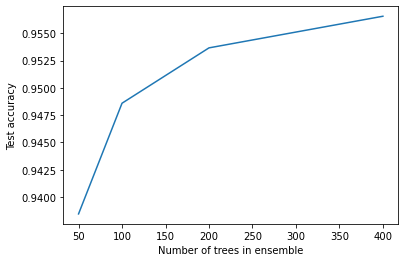

In [11]:
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

200 trees seem to be enough.

How about the depth of the trees?

Text(0, 0.5, 'Test accuracy')

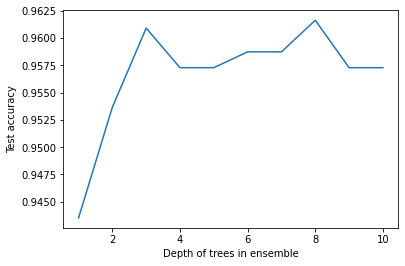

In [12]:
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=200,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Trees of depth 3 seem to be enough.

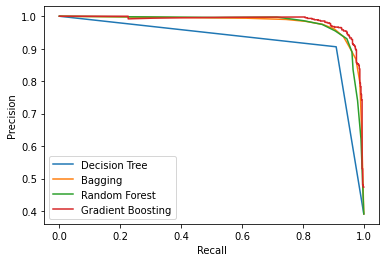

In [13]:
from sklearn.metrics import precision_recall_curve

for index, (name, model) in enumerate(models.items()):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')
savefig('Classification_5_data/precrec.png')